
DEBUG:

Run the whole notebook, then restart it and run it again


# Install & Setup libraries


In [ ]:
#@title Installation
%%time
!sudo apt update
!sudo apt install libcairo2-dev ffmpeg \
    texlive texlive-latex-extra texlive-fonts-extra \
    texlive-latex-recommended texlive-science \
    tipa libpango1.0-dev
!pip install manim
!pip install IPython --upgrade
# after this command i need to restart running environment of google colab!!!

### manim import

check if manim is imported, if it throws error, restart colab notebook and re-run installation

In [ ]:
from manim import *
import numpy as np
import torch

# Helper utility functions

In [ ]:
from scipy.special import softmax
import random 

# NN MANIM helper tools for applying nn stuffs in the linear transformation scene
# ---- helper animaton functions ---
def nn_bias(bias_x, bias_y):
  def fn(dot):
    x, y, z = dot[:3]

    return np.array([x + bias_x, y + bias_y, z])
  return fn

def nn_sigmoid(dot):
    scale = 4 # should be 1 in MLP DLL
    outDot = torch.sigmoid(torch.tensor(dot / scale)).numpy() * scale
    return outDot

def nn_relu_2d(dot):
    x, y = dot[:2]
    return np.array([max(0., x), max(0., y), 0])
    
def nn_leaky_relu(alpha=0.01):
  def fn(dot):
    x, y = dot[:2]
    return np.array([max(x * alpha, x), max(y * alpha, y), 0])
  return fn

# identity fn
def nn_softmax(dot): 
  return softmax(dot)
# ------

def generate_light_color(seed):
    random.seed(seed)
    r = random.randint(200, 255)
    g = random.randint(100, 255)
    b = random.randint(100, 255)
    return f"#{r:02x}{g:02x}{b:02x}"



# one-hot-encodding  

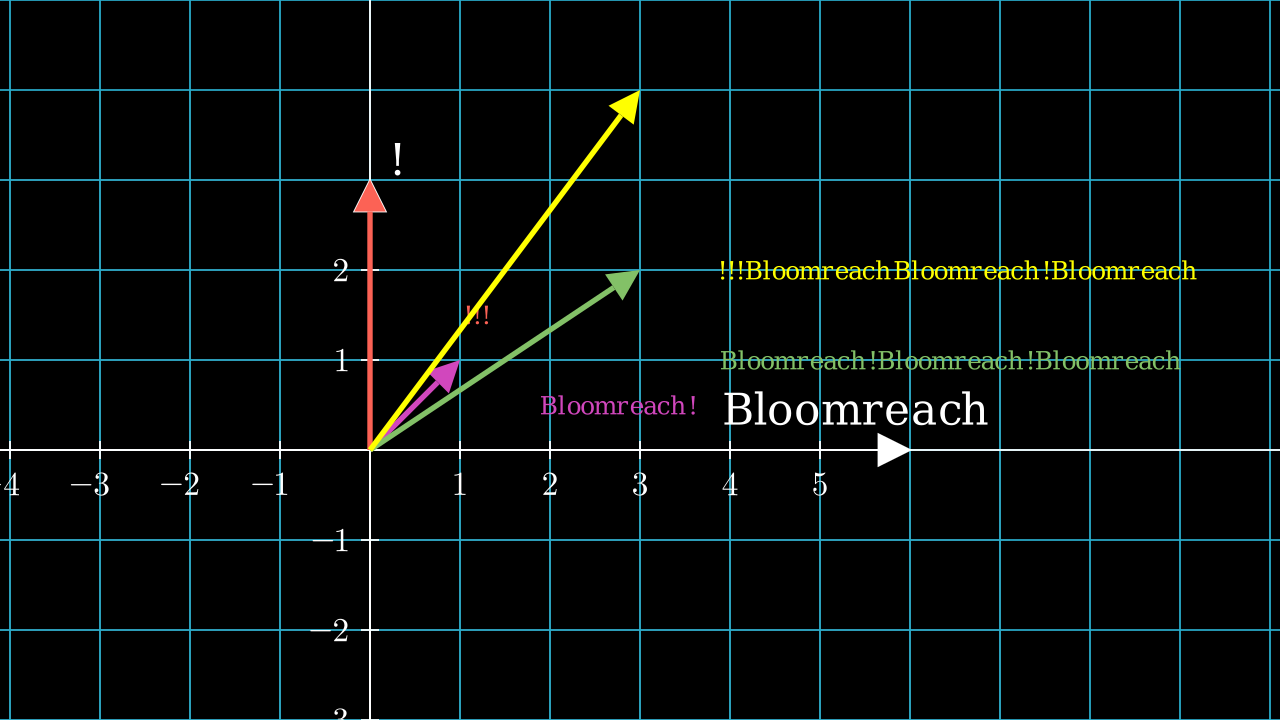

CPU times: user 1.14 s, sys: 64.1 ms, total: 1.21 s
Wall time: 10.1 s


In [ ]:
#@title ## 2D one-hot-encoding
# 2D plane with 2 words from the tokenizer
%%time
%%manim -qm -v WARNING OneHotEncoddings2D

one_hot_dim_embeddings = ['Bloomreach', '!']

class OneHotEncoddings2D(LinearTransformationScene, MovingCameraScene):

    def construct(self):

        # hide linear transformation unit vectors
        for vector in self.basis_vectors:
            vector.set_opacity(0)
            
        self.camera.frame_center += RIGHT * 3 + UP
        sentences = [
          {
            "label":  "!!!",
            "color": RED
          },
          {
            "label":  "Bloomreach!",
            "color": PINK,
          },
          {
            "label":  "Bloomreach!Bloomreach!Bloomreach",
            "color": GREEN,
          },{
            "label":  "!!!BloomreachBloomreach!Bloomreach",
            "color": YELLOW,
          },
        ]

        for s in sentences:
          # compute coords by sentences
          s['coords'] = np.array([s['label'].count(word) for word in one_hot_dim_embeddings])          


        axes = Axes(
            # TODO: magic constants to synchronize axis with LinearTransformationScene
            # I do not outnderstand how to do it proprerly right now
            x_range=[-6, 6],
            y_range=[-3, 3],
        )
        axes.x_axis.add_numbers()
        axes.y_axis.add_numbers()
       

        # create function to define axis labels which will read global config as a axis colors
        input_axis_one_hot_enc_labels = axes.get_axis_labels(
            Text("Bloomreach", font_size=35),
            Text("!", font_size=35),
        )

        self.add(
          axes,
          input_axis_one_hot_enc_labels
        )

        elements = []

        for x in sentences:
          vec = Vector(x['coords'], color=x['color'])

          sticky_label = always_redraw(lambda : Text(
              x['label'],
              color=x['color'],
              font_size=20
            ).next_to(vec, buff=0.9)
          )

          elements += [vec, sticky_label]


        self.add(VGroup(*elements))





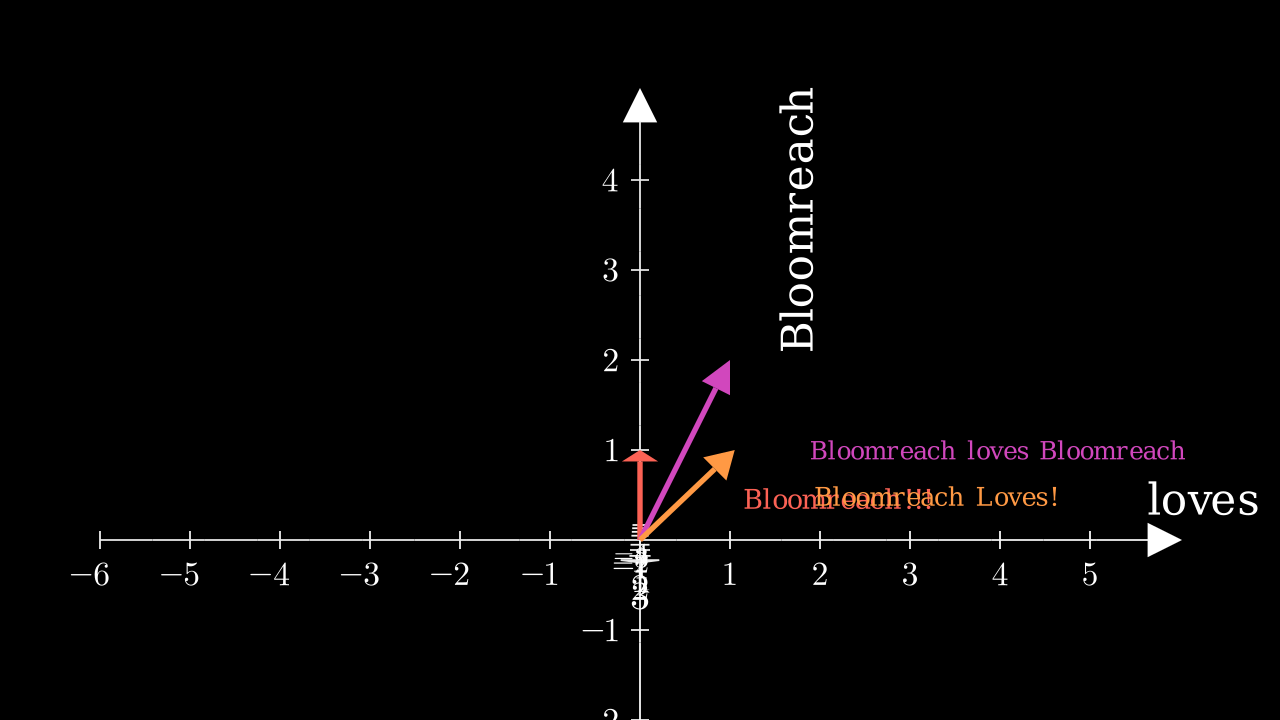

CPU times: user 1.45 s, sys: 11 ms, total: 1.46 s
Wall time: 1.91 s


In [ ]:
#@title ## 3D one-hot-encoding
%%time
%%manim -qm -v WARNING OneHotEncoddings2D

# Visual word2vec
one_hot_enc_space = [
    {
        # one hot encodding
        "label": "loves",
        # Do I want to have a colors for the axis space?
        "color": RED,
    },
    {
        "label": "Bloomreach",
        "color": BLUE,
    },
    {
        "label": "!",
        "color": YELLOW,
    },
]



# 3D scene has its own camera: MovingCameraScene
class OneHotEncoddings2D(ThreeDScene):

    def construct(self):
      
        # I need to set theta=0 and move whole camera UP... to make proper animation
        self.set_camera_orientation(gamma=90 * DEGREES, phi=0 * DEGREES, theta=0 * DEGREES)
        # move camera UP
        self.camera.frame_center += UP
       

        sentences = [
          {
            "coords": np.array([0, 1, 3]), # could be computed from "label"
            "label":  "Bloomreach!!!",
            "color": RED,
            "position": UP + LEFT,
          },
          {
            "coords": np.array([1, 2, 0]), # could be computed from "label"
            "label":  "Bloomreach loves Bloomreach",
            "color": PINK,
            "position": UP,
          },
          {
            "coords": np.array([1, 1, 1]), # could be computed from "label"
            "label":  "Bloomreach Loves!",
            "color": '#F94',
            "position": LEFT,
          },
        ]

       
        # # random constants
        axes_3d = ThreeDAxes(
            x_length=12, # to top
            y_length=10, # to right
            z_length=8, # to up -> goes from screen into user body
        )
        axes_3d.x_axis.add_numbers()
        axes_3d.y_axis.add_numbers()
        axes_3d.z_axis.add_numbers()

        # create function to define axis labels which will read global config as a axis colors
        input_axis_one_hot_enc_labels = axes_3d.get_axis_labels(*[
            Text(item['label'], font_size=35) 
            for item in one_hot_enc_space
        ])

        self.add(
          axes_3d,
          input_axis_one_hot_enc_labels
        )
        # TODO: do the final animation
        
        # put vectors here
        elements = []

        for x in sentences:
          one_hot_enc_word = Vector(x['coords'], color=x['color'])
          sticky_label = Text(
              x['label'],
              color=x['color'],
              font_size=20
          ).next_to(one_hot_enc_word, buff=0.9)
          elements += [one_hot_enc_word, sticky_label]

        self.add(VGroup(*elements))

        ANGLE_PER_SEC_SPEED = 360 / 12 # Wall time: 4min 17s
        self.begin_ambient_camera_rotation(rate=ANGLE_PER_SEC_SPEED*DEGREES, about='phi')
        # comment it out for debug
        # self.wait(0.2)
        self.wait(360/ANGLE_PER_SEC_SPEED)
        self.stop_ambient_camera_rotation(about='phi')



# Word embeddings 

In [ ]:
#@title ## Setup

# --- word 2 vec setup ---
"""
nn.Sequence(
  nn.Linear(3,2, bias=True),
  nn.Sigmoid(),
  nn.Linear(2,3, bias=True),
)
"""
word_2_vec_weights = {
    # reduction from 3d to 2d
    "embed_2d_1": np.array([
        [-1.0,  0.5, 0],
        [ 0.8,  0.5, 0],
        [ 1.0, -0.9, 0]
    ]),
    # 2 dim
    "embed_2d_bias_1": np.array([-0.8, 1, 0]),
    "sigmoid": "noop",
    # expand from 2d into 3d
    "linear_1": np.array([
      [ 0.6, 0.8, 4],
      [-0.2, 1.1, 2],
      [   0,   0, 0]
    ]),
    "bias_1": np.array([4, -0.5, -3.5]),
    "softmax": "noop"
}

one_hot_enc_space = [
    {
        # one hot encodding
        "label": "loves",
        "color": RED,
    },
    {
        "label": "Bloomreach",
        "color": BLUE,
    },
    {
        "label": "!",
        "color": YELLOW,
    },
]


In [ ]:
#@title ## Word2Vec training

%%time
%%manim -qm -v WARNING Word2Vec_trained_inferring

from scipy.special import softmax

w2v_training_infer_data = {
    "coords": np.array([0, 2, 2]),
    "label":  "! Bloomreach <MASK> Bloomreach !",
    "color": PINK,
    "position": DOWN,
}


def create_vec_axis_shadows(vec3d):
  return VGroup(
      DashedLine(ORIGIN, [vec3d[0], 0, 0], color=one_hot_enc_space[0]['color']),
      DashedLine(ORIGIN, [0, vec3d[1], 0], color=one_hot_enc_space[1]['color']),
      DashedLine(ORIGIN, [0, 0, vec3d[2]], color=one_hot_enc_space[2]['color'])
  )

def sigmoid_act_fn(vec): 
  out = 1 / (1 + np.exp(-vec))
  return out

class Word2Vec_trained_inferring(ThreeDScene):
    def construct(self):
        RUN_TIME = 2

        # ----- init global values -----
        global mut_main_vector
        mut_main_vector =  w2v_training_infer_data['coords']
        embed_words_vec = Vector(mut_main_vector, color=w2v_training_infer_data['color'])
        embed_words_shadow = VGroup(create_vec_axis_shadows(mut_main_vector))
        
        def set_main_vector(new_vec_coords):
          # update outerscope global variable
          global mut_main_vector

          mut_main_vector = new_vec_coords
          self.play(
              Transform(embed_words_vec, Vector(mut_main_vector, color=w2v_training_infer_data['color'])),
              Transform(embed_words_shadow, create_vec_axis_shadows(mut_main_vector)),
              run_time=RUN_TIME
          )
          self.wait()

        # ----- setup enronment UI -----
        self.set_camera_orientation(gamma=35 * DEGREES, phi=35 * DEGREES, theta=-35 * DEGREES)

        axes_3d = ThreeDAxes(
            x_length=12, # to top
            y_length=10, # to right
            z_length=8, # to up -> user
        )

        # create function to define axis labels which will read global config as a axis colors
        input_axis_one_hot_enc_labels = axes_3d.get_axis_labels(*[
            Text(item['label'], color=item['color'], font_size=35) 
            for item in one_hot_enc_space
        ])
        self.play(
            Write(VGroup(
              embed_words_vec,
              embed_words_shadow,
              axes_3d,
              input_axis_one_hot_enc_labels
            )),
            run_time=RUN_TIME
        )


        # convert my custom structure into MANIM Text which is pinned next to Dot
        # need to use always_redraw to ignore data transformation for the points
        sticky_label = always_redraw(lambda : Text(
            w2v_training_infer_data['label'],
            color=w2v_training_infer_data['color'],
            font_size=20
          ).next_to(embed_words_vec, w2v_training_infer_data['position'], buff=0.9)
        )
        self.add(sticky_label)

        # --- start inferring neural net ---
        self.move_camera(gamma=45 * DEGREES, phi=45 * DEGREES, theta=-45 * DEGREES)

        self.play(FadeOut(input_axis_one_hot_enc_labels), run_time=RUN_TIME)

        # 1.st linear layer took 3D into 2D dimension reduction
        set_main_vector(mut_main_vector @ word_2_vec_weights["embed_2d_1"]) # nn.embed()
        self.move_camera(gamma=90 * DEGREES, theta=0 * DEGREES, phi=0 * DEGREES, run_time=RUN_TIME)
    
        # bias1 transformation
        set_main_vector(mut_main_vector + word_2_vec_weights['embed_2d_bias_1'])

        # ----- non linear transformation (sigmoid) -----
        # apply sigmoid for first 2 dimension (reduced latent space) -> third dim is hidden
        set_main_vector(np.concatenate((sigmoid_act_fn(mut_main_vector[:2]), [0])))
        
        # back to start position
        self.move_camera(gamma=0 * DEGREES, phi=45 * DEGREES, theta=-45 * DEGREES, run_time=RUN_TIME)
      
        set_main_vector(mut_main_vector @ word_2_vec_weights["linear_1"])

        set_main_vector(mut_main_vector + word_2_vec_weights["bias_1"])
        

        # scale it for better visualization
        set_main_vector(softmax(mut_main_vector))

        self.play(Write(VGroup(input_axis_one_hot_enc_labels)), run_time=RUN_TIME)

        # self.move_camera(gamma=0 * DEGREES, phi=45 * DEGREES, theta=-45 * DEGREES, zoom=2)
        print('final output is: ', mut_main_vector)
        
        self.wait()



final output is:  [0.93185149 0.02554631 0.04260221]


CPU times: user 1min 16s, sys: 1.2 s, total: 1min 17s
Wall time: 1min 31s


In [ ]:
#@title ## Word2Vec output simple lookup table

%%time
%%manim -qm -v WARNING LinearTransformationXXX


class LinearTransformationXXX(ThreeDScene):
    def construct(self):

        RUN_TIME = 2
        # self.camera.frame_center += UP
        # should be array to support multiple one-hot-encoding batch
        # one hot encoded hash map
        input_data = [
            {
              "coords": [1, 0, 0],
              "label":  "Loves",
              "color": RED,
            },
            {
              "coords": [0, 1, 0],
              "label": "Bloomreach",
              "color": BLUE,
            },
            {
              "coords": [0, 0, 1],
              "label": "!",
              "color": YELLOW,
            },
        ]

        axes_3d = ThreeDAxes()

        one_hot_enc_axis_labels = axes_3d.get_axis_labels(
            *[
                Text(item['label'], color=item['color'], font_size=30) for item in one_hot_enc_space
            ]
        )
        self.add(axes_3d, one_hot_enc_axis_labels)

        self.set_camera_orientation(gamma=45 * DEGREES, phi=45 * DEGREES, theta=-45 * DEGREES)
        
        vector_coords = []

        def change_vec_positions():
          # 2. compute new vectors
          transformed_vectors = [Vector(coords, color=origin['color']) for origin, coords in zip(input_data, vector_coords)]
          # 3. show animation
          self.play(*[Transform(prev, next) for prev, next in zip(embed_words_vec, transformed_vectors)], run_time=RUN_TIME)
          self.wait()
  
        # add axis description and make animation to put only 2 vector and guessing the word in the middle
        embed_words_vec = [
            Vector(p['coords'], color=p['color'])
            # always_redraw(lambda p=p: Dot(self.plane.coords_to_point(*p['coords']), color=p['color']))
            for p in input_data
        ]
        
        
        # convert my custom structure into MANIM Text which is pinned next to Dot
        sticky_labels = VGroup(*[
            # need to use always_redraw to ignore data transformation for the points
            always_redraw(lambda index=index, p=p: Text(
                p['label'],
                color=p['color'],
                font_size=20
              ).next_to(embed_words_vec[index], 
                        # p['position'],
                        # buff=0.9
                        ))
            # always_redraw(lambda index=index, p=p: Text(p['label'], color=p['color']).next_to(sticky_dots[index]))
            for index, p in enumerate(input_data)
        ])

        self.play(
          Write(VGroup(*embed_words_vec)),
          Write(sticky_labels),
          run_time=RUN_TIME
        )

        self.wait()

        self.play(FadeOut(one_hot_enc_axis_labels), run_time=RUN_TIME)


        vector_coords = ([p['coords'] for p in input_data])

        # 1.st linear layer took 3D into 2D dimension reduction
        vector_coords = vector_coords @ np.array(word_2_vec_weights['embed_2d_1'])


        change_vec_positions()

        self.move_camera(
            gamma=90 * DEGREES, #45?
            theta=0 * DEGREES,
            phi=0 * DEGREES,
            run_time=RUN_TIME
        )
        self.wait()
        
        # TODO: add axis description to interpret O(2) latent space somehow
        # Y => positivity

        one_hot_enc_axis_labels = axes_3d.get_axis_labels(
            Text('IT', font_size=35),
            Text('❤️', font_size=35),
            Text('', font_size=0),
        )
        self.play(Write(one_hot_enc_axis_labels), run_time=RUN_TIME)
        self.wait()




CPU times: user 1min 16s, sys: 1.41 s, total: 1min 17s
Wall time: 1min 25s


## Hugging face, GPT2 token embeddings + word context adding

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 57.3 MB/s eta 0:00:00


In [ ]:
# gpt2 model
from transformers import pipeline, set_seed, GPT2Tokenizer, GPT2Model

generator = pipeline('text-generation', model='gpt2')
set_seed(42)

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
gpt2_model = GPT2Model.from_pretrained('gpt2')

In [ ]:
import torch
from IPython.display import display
text = " programmer salesman chef police painter actor singer dentist doctor driver"

encoded_input = tokenizer(text, return_tensors='pt')

one_hot_enc_input = encoded_input['input_ids']
tokens_from_ids = tokenizer.convert_ids_to_tokens(one_hot_enc_input[0])

print('--- tokenizer ---')
display(list(zip(tokens_from_ids, one_hot_enc_input[0].tolist())))

gpt2_layers = list(gpt2_model.children())

wte_embedding = gpt2_layers[0] # token embedding Embedding(50257, 768)
wpe_embedding = gpt2_layers[1] # position embedding Embedding(1024, 768)

token_embeddings = wte_embedding(one_hot_enc_input)

print('--- token_embeddings ---')
print("embeddings has: ", token_embeddings.shape, "dim") # 768

""" 
# we don't need to work with positional embeddings right now
position_embeddings = wpe_embedding(torch.tensor(
    [list(range(len(one_hot_enc_input[0])))]
))
out_embed = token_embeddings + position_embeddings
"""



# print('--- 2 layer input tensor ---')
# print(out_embed.shape)


print('--- output tensor ---')
output = gpt2_model(**encoded_input)
# print(output)

--- tokenizer ---


[('Ġprogrammer', 24292),
 ('Ġsalesman', 42414),
 ('Ġchef', 21221),
 ('Ġpolice', 1644),
 ('Ġpainter', 34537),
 ('Ġactor', 8674),
 ('Ġsinger', 14015),
 ('Ġdentist', 38408),
 ('Ġdoctor', 6253),
 ('Ġdriver', 4639)]

--- token_embeddings ---
embeddings has:  torch.Size([1, 10, 768]) dim
--- output tensor ---


In [ ]:
# use PCA for visualization of BERT tokens
import torch
from sklearn.decomposition import PCA

def convert_bert_vector_into_2D_plane_with_label(bert_token_embeddings, labels):
  pca_words = bert_token_embeddings.detach().numpy().squeeze(0)

  # 2 dims have nice visual representation
  pca = PCA(n_components=2)
  pca_result = pca.fit_transform(pca_words)

  output = [(token.replace('Ġ', ' '), coords.tolist()) for token, coords in list(zip(labels, pca_result))]
  return output


print('GPT2 token embeddings')
display(convert_bert_vector_into_2D_plane_with_label(token_embeddings, tokens_from_ids))

# we don't need to work with positional embeddings right now
# print('GPT2 position embeddings')
# display(convert_bert_vector_into_2D_plane_with_label(position_embeddings, tokens_from_ids))

print('GPT2 output')
display(convert_bert_vector_into_2D_plane_with_label(output['last_hidden_state'], tokens_from_ids))

GPT2 token embeddings


[(' programmer', [-0.6703693866729736, -0.5460745692253113]),
 (' salesman', [0.29039010405540466, -1.3190736770629883]),
 (' chef', [0.07789912074804306, -0.35883140563964844]),
 (' police', [0.4129902422428131, 2.0767762660980225]),
 (' painter', [-0.7331179976463318, -1.1172713041305542]),
 (' actor', [-1.537954330444336, 0.3434353172779083]),
 (' singer', [-1.3139631748199463, -0.0594731867313385]),
 (' dentist', [1.9673207998275757, -0.8166225552558899]),
 (' doctor', [1.58192777633667, 0.3378007411956787]),
 (' driver', [-0.07512232661247253, 1.459334373474121])]

GPT2 output


[(' programmer', [118.3005142211914, 6.658633708953857]),
 (' salesman', [-20.252290725708008, 9.033636093139648]),
 (' chef', [-14.13742733001709, 15.166399002075195]),
 (' police', [-41.96971893310547, 18.746318817138672]),
 (' painter', [-9.164649963378906, -11.433457374572754]),
 (' actor', [-1.6371395587921143, -14.554608345031738]),
 (' singer', [-1.2329576015472412, -8.26647663116455]),
 (' dentist', [-10.440388679504395, -9.874096870422363]),
 (' doctor', [6.509962558746338, 0.3779960870742798]),
 (' driver', [-25.975831985473633, -5.854289531707764])]

In [ ]:
#@title ### Word2vec real words embeddings

# TODO: regenerate
embed_tokens = [('post', [3.192081928253174, -0.5816472172737122]),
 (' salesman', [-0.5374818444252014, 0.5916483998298645]),
 (' astronaut', [-0.7845840454101562, -1.39791738986969]),
 (' chef', [-0.5355159640312195, 0.39920318126678467]),
 (' police', [1.0787581205368042, 0.3650737404823303]),
 (' prince', [-0.1807371973991394, -0.4279634356498718]),
 (' painter', [-0.3731570839881897, -0.32514089345932007]),
 (' actor', [-0.6682168841362, -1.1607325077056885]),
 (' singer', [-0.5830039978027344, -0.8654555678367615]),
 (' dentist', [-0.3847857713699341, 2.1382977962493896]),
 (' doctor', [-0.06429953128099442, 1.522304654121399]),
 (' programmer', [-0.5169674158096313, -0.4936331808567047]),
 (' driver', [0.3579089343547821, 0.23596113920211792])]

# position_embeddings = [('n', [8.218185424804688, -0.8591075539588928]),
#   ('umbers', [0.6889200806617737, 2.3983383178710938]),
#   (' like', [0.1780886948108673, 1.9863308668136597]),
#   (' 3', [0.0052772401832044125, 1.4688812494277954]),
#   (',', [-0.13420556485652924, 1.0395114421844482]),
#   (' 7', [-0.26797664165496826, 0.7117360830307007]),
#   (' and', [-0.370187371969223, 0.43350058794021606]),
#   (' 11', [-0.45802393555641174, 0.1922411322593689]),
#   (' are', [-0.5333029627799988, -0.016528526321053505]),
#   (' much', [-0.5930384993553162, -0.19558697938919067]),
#   (' nicer', [-0.6323698163032532, -0.3447014093399048]),
#   (' and', [-0.6683499813079834, -0.4923684597015381]),
#   (' more', [-0.7101086974143982, -0.6175867319107056]),
#   (' beautiful', [-0.7401115298271179, -0.7199050784111023]),
#   (' than', [-0.7614869475364685, -0.8291263580322266]),
#   (' 10', [-0.7897819876670837, -0.916800856590271]),
#   (',', [-0.7961198687553406, -1.0047814846038818]),
#   (' 12', [-0.8188081383705139, -1.0849709510803223]),
#   (' ', [-0.8166013956069946, -1.1490758657455444])]


In [ ]:
#@title ## Visual word vectors in the latent space

%%time
%%manim -qm -v WARNING SimpleLinearTransformationExample

import random

# word 2 vec => TODO: generate color for each word based on label seed!!!

"""
BERT + input text:
text = " salesman chef police painter actor singer dentist doctor driver"
"""

bert_professions_embed_tokens = [
  (' programmer', [-0.5169674158096313, -0.4936331808567047]),
  (' salesman', [-0.5374818444252014, 0.5916483998298645]),
  (' chef', [-0.5355159640312195, 0.39920318126678467]),
  (' police', [1.0787581205368042, 0.3650737404823303]),
  (' painter', [-0.3731570839881897, -0.32514089345932007]),
  (' actor', [-0.6682168841362, -1.1607325077056885]),
  (' singer', [-0.5830039978027344, -0.8654555678367615]),
  # (' dentist', [-0.3847857713699341, 2.1382977962493896]),
  (' doctor', [-0.06429953128099442, 1.522304654121399]),
  (' driver', [0.3579089343547821, 0.23596113920211792])
]

class SimpleLinearTransformationExample(LinearTransformationScene, MovingCameraScene):
    def construct(self):
        
        # hide linear transformation unit vectors
        for vector in self.basis_vectors:
            vector.set_opacity(0)

        self.camera.frame_center += RIGHT + UP/2
        # self.camera.frame.scale(0.5)
        self.play(self.camera.frame.animate.scale(0.5))
       

        static_word_embed = [
            # TODO: do i need to call coords_to_point?
            Dot(self.plane.coords_to_point(coords[0], coords[1]), color=generate_light_color(index))
            for index, (label, coords) in enumerate(bert_professions_embed_tokens)
        ]
        
        word_embed_labels = [
            # buff setup distance text from the Dot
            Text(p[0], font_size=12, color=generate_light_color(index)).next_to(static_word_embed[index], buff=0.05)
            for index, p in enumerate(bert_professions_embed_tokens)
        ]

        self.play(*[Write(x) for x in [
            VGroup(*static_word_embed),
            VGroup(*word_embed_labels),
        ]])

        self.wait(1)
        
        self.play(*[Write(x) for x in [
            Text("x - Physical", font_size=20).next_to(ORIGIN + RIGHT * 2 + DOWN/2),
            Text("y - Non-artistic", font_size=20).next_to(ORIGIN + UP*2.2)
        ]])
            

        self.wait(2)



CPU times: user 6.19 s, sys: 213 ms, total: 6.4 s
Wall time: 11.1 s


In [ ]:
#@title ## Vector arithmetics in the latent space

%%time
%%manim -qm -v WARNING EmbedWordVecArithmetic

# generate new vectors
employment = [
  (' programmer', [-0.5169674158096313, -0.4936331808567047]),
  (' police', [1.0787581205368042, 0.3650737404823303]),
  (' driver', [0.3579089343547821, 0.23596113920211792])
]


def find_by_first_value(data, target):
    result = next((item[1] for item in data if item[0] == target), None)
    return np.array(result)

police = find_by_first_value(employment, ' police')
driver = find_by_first_value(employment, ' driver')
programmer = find_by_first_value(employment, ' programmer')

# it_police_officer = ("it_police_officer", police - driver + programmer)

# employment.append(it_police_officer)


class EmbedWordVecArithmetic(LinearTransformationScene, MovingCameraScene):
    def construct(self):
        
        # hide linear transformation unit vectors
        for vector in self.basis_vectors:
            vector.set_opacity(0)

        self.camera.frame_center += RIGHT * 2 + UP/2
        self.play(self.camera.frame.animate.scale(0.5))
        self.wait()

        static_word_embed = [
            # TODO: do i need to call coords_to_point?
            Dot(self.plane.coords_to_point(coords[0], coords[1]), color=generate_light_color(index))
            for index, (label, coords) in enumerate(employment)
        ]
        
        word_embed_labels = [
            # buff setup distance text from the Dot
            Text(p[0], font_size=12, color=generate_light_color(index)).next_to(static_word_embed[index], buff=0.05)
            for index, p in enumerate(employment)
        ]

        self.play(*[Write(x) for x in [
            VGroup(*static_word_embed),
            VGroup(*word_embed_labels),
        ]])

        self.play(*[Write(x) for x in [
            Text("x - Physical", font_size=20).next_to(ORIGIN + RIGHT * 2 + DOWN/2),
            Text("y - Non-artistic", font_size=20).next_to(ORIGIN + UP*2.2)
        ]])

        self.wait()

        # ===== Vector Arithmetic =====

        global mut_main_vector
        mut_main_vector = [0, 0]
        main_vector_UI = Vector(mut_main_vector, color=YELLOW)
        
        label_UI = Text("")

        self.add(main_vector_UI, label_UI)
        
        def set_main_vector(new_label, new_vec_coords):
          # update outerscope global variable
          global mut_main_vector
          mut_main_vector = new_vec_coords

          # TODO: add vector coords
          # vector_coords = vec_1.coordinate_label()
          
          self.play(
            Transform(label_UI, Text(new_label, font_size=15, color=YELLOW).next_to(main_vector_UI, buff=0.05)),
            Transform(main_vector_UI, Vector(mut_main_vector, color=YELLOW))
          )
          self.wait()

        set_main_vector("= police", police)
        set_main_vector("= police - driver", mut_main_vector - driver)
        set_main_vector("= police - driver + programmer", mut_main_vector + programmer)
        set_main_vector("IT police officer", mut_main_vector)
        
        self.play(
            Write(Dot(self.plane.coords_to_point(*mut_main_vector), color=YELLOW)),
            FadeOut(main_vector_UI)
        )
        
        self.wait()
          


CPU times: user 11.8 s, sys: 204 ms, total: 12 s
Wall time: 18 s



# Fine tuning

In [ ]:
# @title ### Fine-tuning for usefulness classification

%%time
%%manim -qm -v WARNING SimpleLinearTransformationExample

import random

embed_tokens_to_move = [
]

all_embed_tokens = [
  (' doctor', [-0.06429953128099442, 1.522304654121399]),
  (' programmer', [-0.5169674158096313, -0.4936331808567047]),
  # rest of embeddings
  (' post', [3.192081928253174, -0.5816472172737122]),
  (' salesman', [-0.5374818444252014, 0.5916483998298645]),
  (' astronaut', [-0.7845840454101562, -1.39791738986969]),
  (' chef', [-0.5355159640312195, 0.39920318126678467]),
  (' police', [1.0787581205368042, 0.3650737404823303]),
  (' prince', [-0.1807371973991394, -0.4279634356498718]),
  (' painter', [-0.3731570839881897, -0.32514089345932007]),
  (' actor', [-0.6682168841362, -1.1607325077056885]),
  (' singer', [-0.5830039978027344, -0.8654555678367615]),
  (' dentist', [-0.3847857713699341, 2.1382977962493896]),
  (' driver', [0.3579089343547821, 0.23596113920211792])
]


"""
nn.Sequence(
  nn.Embed(2,2),
  nn.Linear(2,2, bias=True),
  nn.Sigmoid(),
  nn.Linear(2,1, bias=True),
  nn.Sigmoid(),
  nn.Softmax(),
)
"""
mlp_architecture = {
    "embeds": [
        [-0.9,   1.3],
        [ 0.5, -0.63]
    ],
    "linear_1": [
        [0.8, 0.2],
        [0, 0.9]
    ],
    "bias_1": [0.5, -0.5],
    "activation_1": None,
    # map to the output dimension
    "linear_2": [
        # to flat dimension we need to fill only diagonals data
        [0.5, 1], 
        [0, 0],
    ],
    # output 1 dim
    "bias_2": [-0.1, 0],
    "activation_2": None,
    "softmax": None
}

# global DEFAULT_ANIMATION_RUN_TIME
# DEFAULT_ANIMATION_RUN_TIME = 0.02

class SimpleLinearTransformationExample(LinearTransformationScene, MovingCameraScene):
    
    def construct(self):
        # DEBUG
        RUN_TIME = 1.0
        
        self.camera.frame.scale(0.5)

        for vector in self.basis_vectors:
            vector.set_opacity(0)

        static_word_embed = [
          Dot(self.plane.coords_to_point(coords[0], coords[1]), color=generate_light_color(index))
          for index, (label, coords) in enumerate(all_embed_tokens)
        ]
        
        # embed_word_desc
        # convert my custom structure into MANIM Text which is pinned next to Dot
        word_embed_labels = [
            # need to use always_redraw to ignore data transformation for the points
            # buff určuje vzdálenost!! => need to keep it really close
            always_redraw(lambda index=index, p=p: Text(
                p[0],
                # font_size=10,
                color=generate_light_color(index)
              ).next_to(static_word_embed[index], UP if index % 2 else DOWN, buff=0.05))
            for index, p in enumerate(all_embed_tokens)
        ]

        # magic... no idea 
        def clear_after_animation():
              
          self.wait()
          self.moving_mobjects = static_word_embed

          for vector in self.basis_vectors:
              vector.set_opacity(0)
          

        # animation is too slow to debug
        self.play(
            Write(VGroup(*static_word_embed)),
            Write(VGroup(*word_embed_labels)),
            run_time=RUN_TIME
        )
        clear_after_animation()

        self.play(
            # show transformations for only 2 elements
            FadeOut(VGroup(*static_word_embed[2:])),
            FadeOut(VGroup(*word_embed_labels[2:])),
            run_time=RUN_TIME
        )
        # remove unused dots&labels
        static_word_embed = static_word_embed[:2]
        word_embed_labels = word_embed_labels[:2]
        clear_after_animation()

        self.apply_matrix(mlp_architecture['linear_1'], run_time=RUN_TIME)
        clear_after_animation()

        self.apply_nonlinear_transformation(nn_bias(*mlp_architecture['bias_1']), run_time=RUN_TIME)
        clear_after_animation()

        self.apply_nonlinear_transformation(sigmoid, run_time=RUN_TIME)
        clear_after_animation()

        self.play(self.camera.frame.animate.scale(0.7), run_time=RUN_TIME)
        clear_after_animation()
        
        self.apply_matrix(mlp_architecture['linear_2'], run_time=RUN_TIME)
        clear_after_animation()

        self.apply_nonlinear_transformation(nn_bias(*mlp_architecture['bias_2']), run_time=RUN_TIME)
        clear_after_animation()
        
        # FIX dimension reduction fn applience
        # # Ignore sigmoid right now... because it's applied for both dimensions instead of just X
        # self.apply_nonlinear_transformation(sigmoid, run_time=RUN_TIME)
        # clear_after_animation()

        # # Ignore softmax right now... because it's applied for both dimensions instead of just X
        # self.apply_nonlinear_transformation(nn_softmax, run_time=RUN_TIME)
        # clear_after_animation()


        x_axis_desc = Text("Usefulness").next_to(ORIGIN + LEFT * 2 + UP)
        self.play(Write(x_axis_desc), run_time=RUN_TIME)

        self.wait(2)

  

In [ ]:
# @title ## NLP fine tuning NER Toxicity visualizer - fine tuned word2vec

%%time
%%manim -qm -v WARNING SimpleLinearTransformationExample


# Fallback: https://www.youtube.com/watch?v=UOvPeC8WOt8&t=644s
# code inspiration: https://github.com/vivek3141/dl-visualization/blob/5600141202181c69785ab77d14f4c66887c130cb/part1/2X2.py

"""
nn.Sequence(
  nn.Embed(2,2),
  nn.Linear(2,2, bias=True),
  nn.Relu(),
  nn.Linear(2,1, bias=False),
)
"""
ner_mlp_architecture = {
    "embeds": [
        [-1, 1], # miob
        [1, 1] # svehla
    ],
    "linear_1": [
        [0.8, 0.2],
        [0, 0.9]
    ],
    "bias_1": [0.5, -0.5],
    "relu_1": None,
    # map to the output dimension
    "linear_2": [
        # to flat dimension we need to fill only diagonals data
        [0.5, -0.5], 
        [0, 0],
    ],
}

# embedding data
input_data = [
    {
        # one hot encodding
        "coords": [1, 0], # === 0 (index)
        "label": "Miob",
        "color": RED,
    },
    {
        # one hot encodding
        "coords": [0, 1], # === 1 (index)
        "label": "Svehla",
        "color": BLUE,
    },
]


class SimpleLinearTransformationExample(LinearTransformationScene, MovingCameraScene):
    def construct(self):

        # zoom in
        self.play(self.camera.frame.animate.set_height(5))
        # self.plane.scale(2.5)

        # === initialize objects === 
        # convert my custom structure into MANIM Dots
        # TODO: replace Dot with Vector somehow
        # zkusit si pohrát s moving_mobjects a vykašlat se na always_redraw
        sticky_dots = [
            Dot(self.plane.coords_to_point(*p['coords']), color=p['color'])
            # always_redraw(lambda p=p: Dot(self.plane.coords_to_point(*p['coords']), color=p['color']))
            for p in input_data
          ]
        

        # convert my custom structure into MANIM Text which is pinned next to Dot
        sticky_labels = [
            # need to use always_redraw to ignore data transformation for the points
            always_redraw(lambda index=index, p=p: Text(p['label'], color=p['color']).next_to(sticky_dots[index], DOWN, buff=0.1))
            # always_redraw(lambda index=index, p=p: Text(p['label'], color=p['color']).next_to(sticky_dots[index]))
            for index, p in enumerate(input_data)
        ]
            
            
        # magic... no idea 
        def clear_after_animation():
          self.wait()
          self.moving_mobjects = sticky_dots


        self.play(Write(VGroup(*sticky_dots)))
        self.play(Write(VGroup(*sticky_labels)))
        
        clear_after_animation()
        return

        # ---- nn.embed 1 => nn.linear with O(1) complexity ---- 
        self.apply_matrix(ner_mlp_architecture['embeds'])
        clear_after_animation()


        # ---- nn.Linear 1 ---- 
        self.apply_matrix(ner_mlp_architecture['linear_1'])
        clear_after_animation()

        # ---- Bias ---- 
        self.apply_nonlinear_transformation(nn_bias(*ner_mlp_architecture['bias_1']))
        clear_after_animation()
        
        # ---- Activation layer ---- 
        self.apply_nonlinear_transformation(
            # there is a few option which activation function should we use
            # nn_leaky_relu()
            # nn_relu_2d
            nn_sigmoid
        )
        clear_after_animation()
        

        # ---- nn.Linear 2 ---- 
        self.apply_matrix(ner_mlp_architecture['linear_2'])
        clear_after_animation()

        # i create isntance of numberPlane to get coordinates
        coordination_helper_plane = NumberPlane()

        # create a Text object with the label "Hello, world!"
        text = Text("Toxicita")

        text.next_to(coordination_helper_plane.get_right(), DOWN + LEFT)

        # add the text to the scene
        self.play(Write(text))

        self.wait(4)

        # --- TODO: softmax + NLL



UsageError: Cell magic `%%manim` not found.


 
# BERT positional + context word embeddings: TODO: add sentences instead of words

In [ ]:
# @title ### Shared render utils
# => the algorithm is pretty similar as the one which we described but it has O(n) complexity instead of O(1) as word2vec

def render_context_embeddings(self, vectors):
  for vector in self.basis_vectors:
      vector.set_opacity(0)
  
  self.camera.frame_center += RIGHT * 3
  self.camera.frame.scale(1.2)
  
  axes = Axes(
      # TODO: magic constants to synchronize axis with LinearTransformationScene
      # I do not outnderstand how to do it proprerly right now
      x_range=[-6, 6],
      y_range=[-3, 3],
  )
  

  # create function to define axis labels which will read global config as a axis colors
  axes_labels = axes.get_axis_labels(
      Text('Machine learning', font_size=35),
      Text('sport', font_size=35),
  )

  self.add(axes_labels)

  elements = []

  for index, (label, coords, position) in enumerate(vectors):
    color = generate_light_color(index * 137)
    vec_ui = Vector(coords, color=color)
    label_ui = Text(label, color=color, font_size=30).next_to(vec_ui, position)
    elements += [vec_ui, label_ui]


  self.play(Write(VGroup(*elements)))
  self.wait(1)

In [ ]:
# @title ### BERT embeddings for capturing contextual meaning
%%time
%%manim -qm -v WARNING ContextualWordEmbeddings_2

vectors = [
  ('youtube is my favourite social "Network"', (-1, -3), DOWN),
  ('Deep neural "Network"', (1.5, -1.5), RIGHT),
]

class ContextualWordEmbeddings_2(LinearTransformationScene, MovingCameraScene):
    def construct(self):
      render_context_embeddings(self, vectors)
        



CPU times: user 5.53 s, sys: 133 ms, total: 5.66 s
Wall time: 9.97 s


In [ ]:
# @title ### BERT embeddings for contextual and positional embeddings
%%time
%%manim -qm -v WARNING ContextualWordEmbeddings_1

vectors = [
  ('"Adam" is my favorite algorithm', (1.5, -1), DOWN * 2),
  ('My favorite algorithm is "Adam"',  (1.6, -0.9), DOWN + UP*0.2),
  ('"Adam" Ondra is the world\'s best climber', (0.2, 2), UP*0.4),
]

class ContextualWordEmbeddings_1(LinearTransformationScene, MovingCameraScene):
    def construct(self):
      render_context_embeddings(self, vectors)
        



CPU times: user 6.74 s, sys: 108 ms, total: 6.85 s
Wall time: 8.48 s


In [ ]:
# @title ### BERT embeddings for sentence embeddings
%%time
%%manim -qm -v WARNING ContextualWordEmbeddings_3

vectors = [
  ('"Deep diving is dangerous.""', (-3, 3), RIGHT),
  ('"ChatGPT is a deep neural network."', (2, -1), RIGHT),
  ('"ChatGPT has such a deep soul."', (2, -4), RIGHT)
]

class ContextualWordEmbeddings_3(LinearTransformationScene, MovingCameraScene):
    def construct(self):
      render_context_embeddings(self, vectors)
        



CPU times: user 5.14 s, sys: 478 ms, total: 5.61 s
Wall time: 6.92 s


# LLM + ChatGPT Next word prediction
 


In [ ]:
#@title ## Shared Config

gpt_infer_sentence = {
    "coords": np.array([0.8, 1.2, 0]),
    "label":  "Bloomreach loves",
    "color": PINK,
    "position": DOWN,
}

gpt_weights = {
    "linear_1": np.array([
      [ 1.1, -0.8, 0],
      [-0.3, -0.1, 0],
      [   0,    0, 0]
    ]),
    "bias_1": np.array([0.1, 1.5, 0]),
    "linear_2": np.array([
      [-0.1, 1.8, 4],
      [ 0.3, 2.1, 0.5],
      [   0,   0, 0]
    ]),
    "bias_2": np.array([0.1, -0.1, 0.5]),
    "softmax": "noop"
}

gpt_out_prob_one_hot_enc_space = [
    {
        # one hot encodding
        "label": "Bloomreach",
        "color": RED,
    },
    {
        "label": "Loves",
        "color": BLUE,
    },
    {
        "label": "!",
        "color": YELLOW,
    },
]

In [ ]:
#@title ## Inferring next word predictions in LLM

%%time
%%manim -qm -v WARNING ChatGPT_next_word_prediction_inferring
# word2vec has 3 phases
# 1. shoe one-hot-encoded inputs in simple 3D space
# 2. show how to find linear transformation parameters to guess middle word (the hardest part)
# 3. apply the same transformation into one-hot-encodings to get static compress word vector in latent space

from scipy.special import softmax


# return
# # should be array to support multiple one-hot-encoding batch
def create_vec_axis_shadows(vec3d):
  # its not pixel perfect... it looks like MANIM bug
  return VGroup(
      # TODO:
      # DashedLine(ORIGIN, [vec3d[0], 0, 0], color=gpt_out_prob_one_hot_enc_space[0]['color']),
      # DashedLine(ORIGIN, [0, vec3d[1], 0], color=gpt_out_prob_one_hot_enc_space[1]['color']),
      # DashedLine(ORIGIN, [0, 0, vec3d[2]], color=gpt_out_prob_one_hot_enc_space[2]['color'])
  )

def sigmoid_act_fn(vec): 
  out = 1 / (1 + np.exp(-vec))
  return out

class ChatGPT_next_word_prediction_inferring(ThreeDScene):
    def construct(self):
        RUN_TIME = 2


        # --- testing
        # TODO: show many points and then hide them to show transformation for only one of them
        grid = NumberPlane()

        # Add the grid to the scene
        self.add(grid)
        # DEBUG


        # ----- init global values -----
        global mut_main_vector
        mut_main_vector =  gpt_infer_sentence['coords'] # what about to start in ORIGIN? 🤔 and animate first init move
        embed_words_vec = Vector(mut_main_vector, color=gpt_infer_sentence['color'])
        embed_words_shadow = VGroup(create_vec_axis_shadows(mut_main_vector)) # start shadow from the center
        
        # TODO: rename to transform_vector_ui(Vec) -> Vec
        def set_main_vector(new_vec_coords):
          # update outerscope global variable
          global mut_main_vector

          mut_main_vector = new_vec_coords
          # 3. show animation
          self.play(
              Transform(embed_words_vec, Vector(mut_main_vector, color=gpt_infer_sentence['color'])),
              Transform(embed_words_shadow, create_vec_axis_shadows(mut_main_vector)),
              run_time=RUN_TIME
          )
          self.wait()

        # ----- setup enronment UI -----
        # fake 2D scene
        self.set_camera_orientation(gamma=90 * DEGREES, theta=0 * DEGREES, phi=0 * DEGREES)
        
        axes_3d = ThreeDAxes(
            # wtf magic constants => wtf document
            x_length=12, # to top
            y_length=10, # to right
            z_length=8, # to up -> user
        )

        # create function to define axis labels which will read global config as a axis colors
        
        self.add(
          # init empty elements
          embed_words_vec,
          # embed_words_shadow,
          axes_3d,
        )



        # convert my custom structure into MANIM Text which is pinned next to Dot
        # need to use always_redraw to ignore data transformation for the points
        sticky_label = always_redraw(lambda : Text(
            gpt_infer_sentence['label'],
            color=gpt_infer_sentence['color'],
            # font_size=20,
            font="Roboto",
          ).next_to(embed_words_vec, gpt_infer_sentence['position'], buff=0.9)
        )
        self.add(sticky_label)
        
        # start inferring neural net
        # self.move_camera(gamma=45 * DEGREES, phi=45 * DEGREES, theta=-45 * DEGREES, run_time=RUN_TIME)

        # 1.st linear layer took 3D into 2D dimension reduction

        # bias1 transformation
        
        # back to start position
      
        set_main_vector(mut_main_vector @ gpt_weights["linear_1"])

        set_main_vector(mut_main_vector + gpt_weights["bias_1"])
        

        # ----- non linear transformation (sigmoid) -----
        # apply sigmoid for first 2 dimension (reduced latent space) -> third dim is hidden
        # TODO: use leaky realu
        set_main_vector(np.concatenate((sigmoid_act_fn(mut_main_vector[:2]), [0])))

        self.move_camera(gamma=0 * DEGREES, phi=45 * DEGREES, theta=-45 * DEGREES, run_time=RUN_TIME)

        set_main_vector(mut_main_vector @ gpt_weights["linear_2"])

        set_main_vector(mut_main_vector + gpt_weights["bias_2"])

        # scale it for better visualization
        set_main_vector(softmax(mut_main_vector))

        output_one_hot_enc_space_labels_UI = axes_3d.get_axis_labels(*[
            Text(item['label'], color=item['color'], font_size=35) 
            for item in gpt_out_prob_one_hot_enc_space
        ])
        self.play(Write(output_one_hot_enc_space_labels_UI), run_time=RUN_TIME)

        # self.move_camera(gamma=0 * DEGREES, phi=45 * DEGREES, theta=-45 * DEGREES, zoom=2)
        print('final output is: ', mut_main_vector)
        
        self.wait(2)



final output is:  [0.0372145  0.18523225 0.77755326]


CPU times: user 2min 39s, sys: 1.79 s, total: 2min 40s
Wall time: 2min 59s


In [ ]:
#@title ## Temperature-based next word selection (Naive Bayes theorem probability-based selection)
%%time
%%manim -qm -v WARNING TemperatureNextWordPicking

# x, y, z

probs = np.array([0.0372145,  0.18523225, 0.77755326])
x, y, z = probs
# change order
probs = [y, x, z]

def get_prob_rectangles(rectangle_heights):
    rectangle_width = 4
    # Calculate the maximum height for scaling
    max_height = max(rectangle_heights)

    # Calculate the height scale factor
    height_scale = 3.5 / max_height
    elements = []
    # Create and position the rectangles
    for i in range(3):
        rectangle = Rectangle(width=rectangle_width, height=rectangle_heights[i]*height_scale, fill_color=gpt_out_prob_one_hot_enc_space[i]['color'], fill_opacity=1)
        rectangle.to_edge(DOWN)
        rectangle.shift((i-1)*5*RIGHT).shift(UP)

        # rectangles.append(rectangle)

        # Add the text labels below each rectangle
        label = Text(gpt_out_prob_one_hot_enc_space[i]['label'], font_size=20, color=WHITE).next_to(rectangle, DOWN)
        height_label = Text(f"{np.round(rectangle_heights[i]*100, 2)}%", font_size=16, color=WHITE)
        # height_label = Text(f"{str(rectangle_heights[i] * 100)}%", font_size=16, color=WHITE)
        height_label.next_to(rectangle, UP, buff=0.2)
        elements += [rectangle, label, height_label]
    return elements


def temperature_scaling(probs, temperature):
    scaled_probs = np.power(probs, 1/temperature)
    scaled_probs /= np.sum(scaled_probs)
    return scaled_probs

class TemperatureNextWordPicking(Scene):
  def construct(self):
      RUN_TIME = 0.5
      rectangle_colors = [BLUE, GREEN, RED]

      # rectangles = []
      rect_probs = probs

      elements = get_prob_rectangles(probs)
      rectangle_group = VGroup(*elements)
      self.play(
          Write(rectangle_group),
          run_time=RUN_TIME
      )
      self.wait()

      temperature_UI = Text('Temperature = 0.0').to_edge(LEFT).to_edge(UP)

      self.play(Write(temperature_UI), run_time=RUN_TIME)

      self.wait(1)
      # chaning temperature
      for index in range(30):
        temperature = 1 + (index / 10)
        rect_probs = temperature_scaling(probs, temperature)
        self.play(
            Transform(temperature_UI, Text(f'Temperature = {np.round(temperature - 1, 2)}').to_edge(LEFT).to_edge(UP)),
            Transform(rectangle_group, VGroup(*get_prob_rectangles(rect_probs))),
            run_time=RUN_TIME
        )
        # self.wait()

      self.wait(1)


CPU times: user 47.4 s, sys: 1.12 s, total: 48.5 s
Wall time: 1min 1s


# Trash
